# Using NumPy on Real Life Data

In [1]:
import math
import collections
import urllib

import pandas as pd
import numpy as np
import matplotlib.pyplot as pp

%matplotlib inline

In [31]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/mGalarnyk/DSE200_Python_for_Data_Analysis/refs/heads/master/data/weather/ghcnd-stations.txt', 'ghcnd-stations.txt')

('ghcnd-stations.txt', <http.client.HTTPMessage at 0x1b6159b0800>)

In [35]:
with open('ghcnd-stations.txt') as file:
    file = file.read()
print(file)

ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       
ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    
AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196
AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930
AG000060390  36.7167    3.2500   24.0    ALGER-DAR EL BEIDA             GSN     60390
AG000060590  30.5667    2.8667  397.0    EL-GOLEA                       GSN     60590
AG000060611  28.0500    9.6331  561.0    IN-AMENAS                      GSN     60611
AG000060680  22.8000    5.4331 1362.0    TAMANRASSET                    GSN     60680
AGE00135039  35.7297    0.6500   50.0    ORAN-HOPITAL MILITAIRE                      
AJ000037575  41.5500   46.6670  490.0    ZAKATALA                               37575
AJ000037579  41.7000   46.8000 1746.0    ALIBEK                                 37579
AJ000037605  41.3000   45.6000  440.0    BOGDANOVKA   

In [40]:
stations = np.genfromtxt('ghcnd-stations.txt',
                         delimiter=[11,9,10,7,3,31,4,4,6],
                         names=['id','latitude', 'longitude', 'elevation', 'state','name', 'gsn','hcn','wmo'],
                         dtype=['U11', 'd', 'd', 'd','U3','U31','U4','U4', 'U6'],
                         autostrip=True)


In [42]:
len(stations)

85284

In [20]:
stations

array([('ACW00011604', 17.1167, -61.7833,  10.1, 'ST JOHNS COOLIDGE FLD', '', ''),
       ('ACW00011647', 17.1333, -61.7833,  19.2, 'ST JOHNS', '', ''),
       ('AE000041196', 25.333 ,  55.517 ,  34. , 'SHARJAH INTER. AIRP', '', 'GSN'),
       ...,
       ('US1NYSR0065', 42.8795, -73.7244,  92.7, 'NY MECHANICVILLE 2.4 SW', '', ''),
       ('US1NYST0002', 42.2211, -77.0251, 474. , 'NY PAINTED POST 5.3 NE', '', ''),
       ('US1NYST0003', 42.0567, -77.0485, 527.3, 'NY SOUTH CORNING 4.7 S', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U31'), ('gsn', '<U4'), ('wmo', '<U6')])

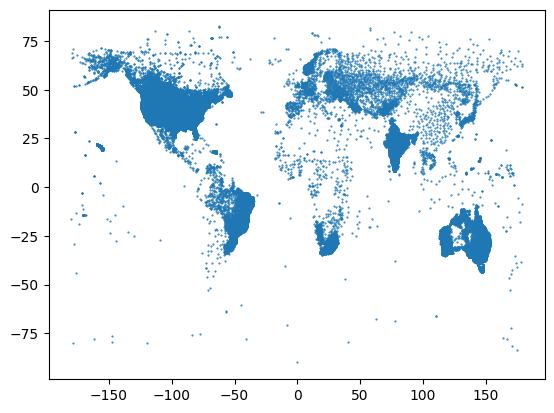

In [43]:
pp.plot(stations['longitude'], stations['latitude'], '.', markersize=1)

In [46]:
ca_stations = stations[stations['state'] == 'CA']

In [47]:
len(ca_stations)

2218

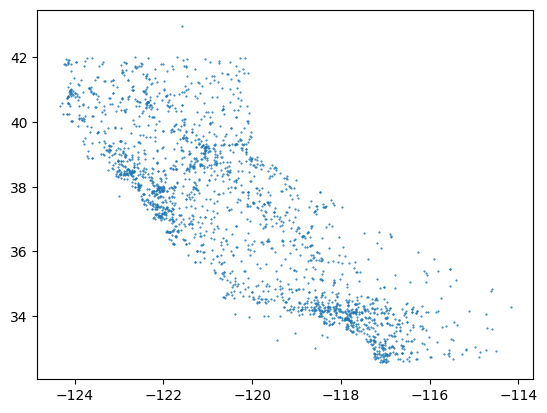

In [48]:
pp.plot(ca_stations['longitude'], ca_stations['latitude'], '.', markersize=1)

In [51]:
stations[np.char.find(stations['name'], 'CALIFORNIA') == 0]

array([('US1CAKN0002', 35.1479, -118.016 , 742.2, 'CA', 'CALIFORNIA CITY 11.9 WSW', '', '', ''),
       ('US1MDSM0009', 38.2994,  -76.497 ,  36. , 'MD', 'CALIFORNIA 0.2 N', '', '', ''),
       ('US1MOFSA135', 38.6277,  -92.5707, 271.9, 'MO', 'CALIFORNIA 0.3 SW', '', '', ''),
       ('US1MOMT0001', 38.5583,  -92.6027, 264.9, 'MO', 'CALIFORNIA 5.4 SSW', '', '', ''),
       ('US1MOMT0002', 38.6329,  -92.5656, 271. , 'MO', 'CALIFORNIA 0.1 NE', '', '', ''),
       ('USC00231189', 38.6278,  -92.5545, 267.9, 'MO', 'CALIFORNIA', '', '', ''),
       ('USC00351250', 45.3667, -118.8333, 982.1, 'OR', 'CALIFORNIA GULCH', '', '', '')],
      dtype=[('id', '<U11'), ('latitude', '<f8'), ('longitude', '<f8'), ('elevation', '<f8'), ('state', '<U3'), ('name', '<U31'), ('gsn', '<U4'), ('hcn', '<U4'), ('wmo', '<U6')])